In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
import numpy as np 

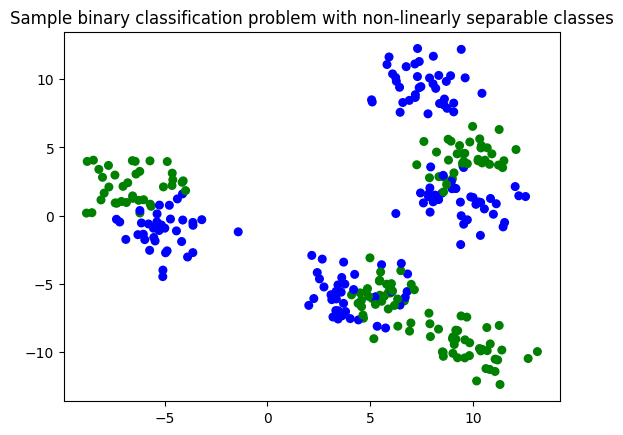

In [15]:
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

In [17]:
from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier 
import ML_mst as mst

%matplotlib notebook
%matplotlib inline

In [26]:
def set_neighbord():
    dict_neighbord = {}
    for i in range(1,31):
        clf = KNeighborsClassifier(n_neighbors = i)
        clf.fit(X_train_scaled, y_train)
        score = clf.score (X_test_scaled, y_test)
        dict_neighbord[i] =  score

    max_score = max(dict_neighbord.values())
    keys_with_max_value = [k for k, v in dict_neighbord.items() if v == max_score]
    min_key_value  = min(keys_with_max_value)
    mst.plot_decision_boundary(clf, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(min_key_value, max_score), 
                                precision=0.01,plot_symbol_size = 50)

    return dict_neighbord 

Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


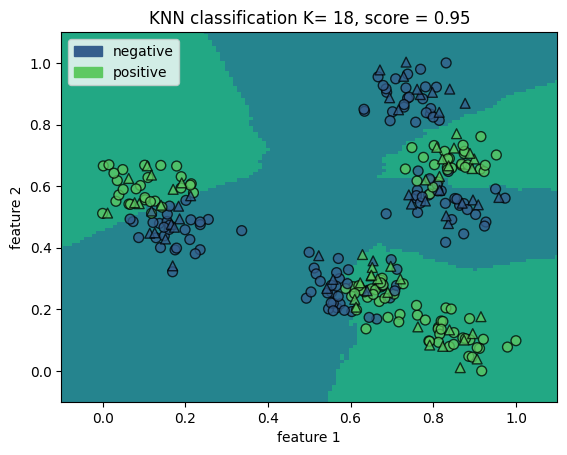

{1: 0.9333333333333333,
 2: 0.8933333333333333,
 3: 0.8933333333333333,
 4: 0.88,
 5: 0.9066666666666666,
 6: 0.88,
 7: 0.9333333333333333,
 8: 0.9066666666666666,
 9: 0.92,
 10: 0.92,
 11: 0.9066666666666666,
 12: 0.8933333333333333,
 13: 0.8933333333333333,
 14: 0.92,
 15: 0.8933333333333333,
 16: 0.92,
 17: 0.9333333333333333,
 18: 0.9466666666666667,
 19: 0.9333333333333333,
 20: 0.9333333333333333,
 21: 0.9333333333333333,
 22: 0.92,
 23: 0.92,
 24: 0.92,
 25: 0.9466666666666667,
 26: 0.9466666666666667,
 27: 0.9333333333333333,
 28: 0.92,
 29: 0.92,
 30: 0.9066666666666666}

In [27]:
dict_neighbord = set_neighbord()
dict_neighbord

In [28]:
k_best = min_key_value 
score_best = max_score
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 18 , score = 0.9466666666666667
